In [1]:
%matplotlib inline
import numpy as np
import poppy
import matplotlib.pyplot as plt
import astropy.units as u
from llowfs import generate_wfe_array, simulate_multiple_llowfs
import h5py

import timeit

## Generating Data

In [2]:
highest_coeff = 15
bounds = [50e-9]*(highest_coeff-1) #piston not included

N = 10 #number of examples

wfe_array = generate_wfe_array(bounds,N)
print(wfe_array.shape)
print(wfe_array[:,:3])

(14, 10)
[[-4.34117903e-08 -4.05276018e-08  1.64991519e-08]
 [-4.47314179e-08 -2.83814423e-08  1.85576008e-08]
 [ 4.85296149e-08 -1.58326005e-08 -1.25721302e-09]
 [-3.04616696e-08 -4.17589017e-08 -3.41872267e-08]
 [-4.59384586e-08 -8.72040221e-09  4.67461363e-09]
 [ 2.84024013e-08  5.55992861e-09  2.00392264e-08]
 [ 2.11121991e-08  2.81257316e-08  9.41732300e-09]
 [-1.39939704e-08 -2.33330801e-08  3.95262805e-08]
 [ 4.40342426e-08 -2.32548191e-09 -2.16070841e-08]
 [ 4.70682241e-09 -3.85572349e-09  3.18937806e-08]
 [ 2.85160009e-08 -3.35561717e-08  2.31091302e-08]
 [ 4.61009286e-08 -1.02527440e-08 -2.52174674e-08]
 [-1.55656384e-08 -3.67558008e-09 -2.21025985e-08]
 [ 2.46337121e-09  1.11346984e-08  4.49462476e-09]]


In [3]:
file_out = 'test.hdf5'
#size of output images is npix_detector
# oversample pads the pupil plane before performing ffts. This gives more accurate simulations of 
# image plane interactions. oversample=2 is generally too low for this application. 
# oversample=4 works well and doesn't take too long (see notebook'Oversample Comparison')
# 'coronagraph' can be 'vortex' or 'fqpm'. See 'Test Responses' notebook for more info.

oversample = 4
wavelength=632e-9*u.m
coronagraph='vortex'
npix_pupil = 512

npix_detector = 128
detector_fov = 0.3 #arcsec
detector_pixelscale = detector_fov/npix_detector


In [4]:
simulate_multiple_llowfs(wfe_array,file_out,oversample=oversample,wavelength=wavelength,coronagraph=coronagraph,pixelscale=detector_pixelscale,npix_detector=npix_detector,npix_pupil=npix_pupil)

## Reading Data

In [5]:
with h5py.File('test.hdf5', 'r') as hf:
    coeffs = np.array(hf.get('zernike_coeffs'))
    images = np.array(hf.get('images'))
print(coeffs.shape)
print(images.shape)

(14, 10)
(128, 128, 10)


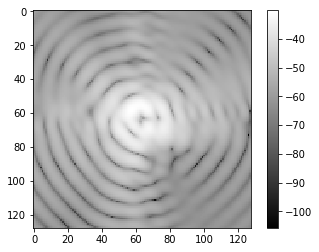

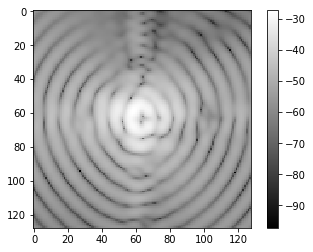

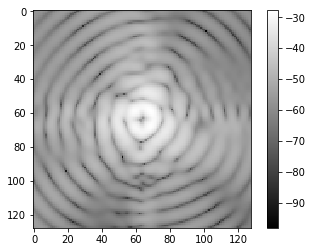

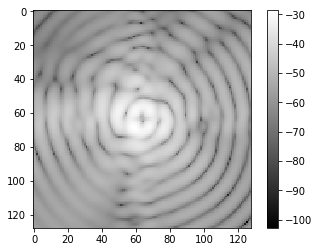

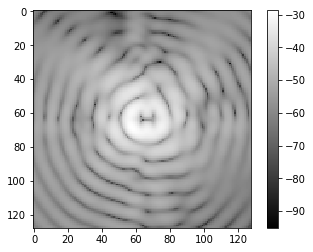

In [6]:
for i in range(5):
    plt.figure()
    plt.imshow(10*np.log10(images[:,:,i]),cmap='gray')
    plt.colorbar()